# Executive Summary


We are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and the goal is to predict the department-wide sales for each store.

Part of the agenda presented by this project is modeling the effects of promotional markdowns events on the prominent holiday weeks in the absence of complete/ideal historical data.

# Import Data and Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Walmart Sale Prediction/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Walmart Sale Prediction/test.csv')
df_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Walmart Sale Prediction/features.csv')
df_stores = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Walmart Sale Prediction/stores.csv')

# Review Data

In [3]:
df_features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [4]:
df_features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [5]:
df_stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [6]:
df_stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [7]:
feature_store = df_features.merge(df_stores, how='inner', on = "Store")

In [8]:
feature_store.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315


In [9]:
df.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False


In [10]:
df_test.head(3)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


In [11]:
feature_store.Date.tail()

8185    2013-06-28
8186    2013-07-05
8187    2013-07-12
8188    2013-07-19
8189    2013-07-26
Name: Date, dtype: object

In [12]:
df_test.tail()

,Store,Dept,Date,IsHoliday
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False
115063,45,98,2013-07-26,False


# Exploratory Data Analysis

In [13]:
feature_store.Date.min(), feature_store.Date.max()

('2010-02-05', '2013-07-26')

In [14]:
df.Date.min(), df.Date.max() , df_test.Date.min(),df_test.Date.max()

('2010-02-05', '2012-10-26', '2012-11-02', '2013-07-26')

In [15]:
## so feature store has values for the date range of study

## Merge feature_store in test and train

In [16]:
train_df = df.merge(feature_store, how='inner', 
                       on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
test_df = df_test.merge(feature_store, how='inner', 
                       on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)


In [17]:
train_df.shape , test_df.shape

((421570, 16), (115064, 15))

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   MarkDown1     114915 non-null  float64
 7   MarkDown2     86437 non-null   float64
 8   MarkDown3     105235 non-null  float64
 9   MarkDown4     102176 non-null  float64
 10  MarkDown5     115064 non-null  float64
 11  CPI           76902 non-null   float64
 12  Unemployment  76902 non-null   float64
 13  Type          115064 non-null  object 
 14  Size          115064 non-null  int64  
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 12.4+ MB


## Convert Date column datatype to DateTime & Extract Day, Week, Month and Year

In [20]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

train_df['Day'] = train_df['Date'].dt.day
train_df['Week'] = train_df['Date'].dt.isocalendar().week
train_df['Month'] = train_df['Date'].dt.month
train_df['Year'] = train_df['Date'].dt.year


test_df['Day'] = test_df['Date'].dt.day
test_df['Week'] = test_df['Date'].dt.isocalendar().week
test_df['Month'] = test_df['Date'].dt.month
test_df['Year'] = test_df['Date'].dt.year

In [21]:
train_df.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,12,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,19,7,2,2010


In [22]:
test_df.head(3)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,2,44,11,2012
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315,9,45,11,2012
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315,16,46,11,2012


## Visualization of Train Data & It's Attributes

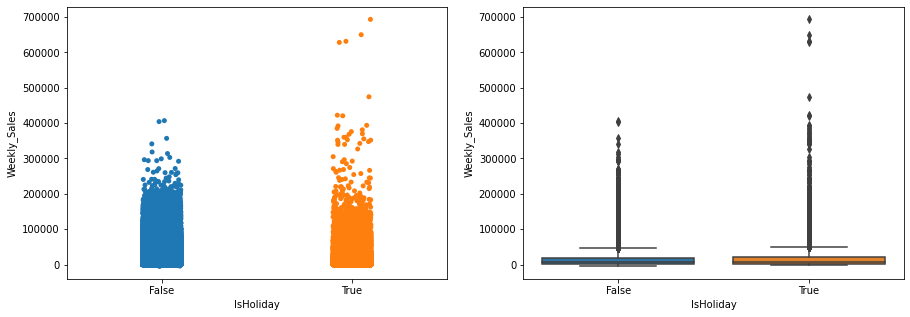

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.stripplot(y=train_df['Weekly_Sales'],x=train_df['IsHoliday'])
plt.subplot(1,2,2)
sns.boxplot(y=train_df['Weekly_Sales'],x=train_df['IsHoliday']);

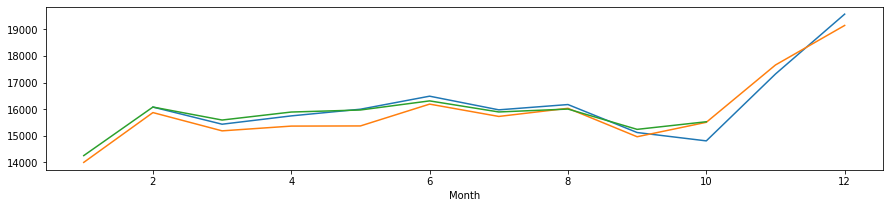

In [24]:
plt.figure(figsize=(15,3))
train_df[train_df['Year']==2010].groupby('Month').mean()['Weekly_Sales'].plot()
train_df[train_df['Year']==2011].groupby('Month').mean()['Weekly_Sales'].plot()
train_df[train_df['Year']==2012].groupby('Month').mean()['Weekly_Sales'].plot()

## Check for Null Values in Train & Test Data Columns

In [25]:
train_df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Day                  0
Week                 0
Month                0
Year                 0
dtype: int64

In [26]:
test_df.isna().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
Day                 0
Week                0
Month               0
Year                0
dtype: int64

## Null Value Treatment for Both Train & Test Data

In [27]:
train =  train_df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5'], axis = 1)
test =  test_df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5'], axis = 1)

#test data has null in CPI and Unemployment. We would fill that with median values
test['CPI'].fillna(test_df['CPI'].median(), inplace = True)
test['Unemployment'].fillna(test_df['Unemployment'].median(), inplace = True)

## Check Train & Test Data Post Removal of Null Values

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   CPI           421570 non-null  float64       
 8   Unemployment  421570 non-null  float64       
 9   Type          421570 non-null  object        
 10  Size          421570 non-null  int64         
 11  Day           421570 non-null  int64         
 12  Week          421570 non-null  UInt32        
 13  Month         421570 non-null  int64         
 14  Year          421570 non-null  int64         
dtypes: UInt32(1), boo

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Temperature   115064 non-null  float64       
 5   Fuel_Price    115064 non-null  float64       
 6   CPI           115064 non-null  float64       
 7   Unemployment  115064 non-null  float64       
 8   Type          115064 non-null  object        
 9   Size          115064 non-null  int64         
 10  Day           115064 non-null  int64         
 11  Week          115064 non-null  UInt32        
 12  Month         115064 non-null  int64         
 13  Year          115064 non-null  int64         
dtypes: UInt32(1), bool(1), datetime64[ns](1), float64(4), int64(6), obje

In [30]:
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Day,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,5,5,2,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,12,6,2,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,19,7,2,2010


# Feature Engineering

## Dummy Variables Creation from Categorical Columns

In [31]:
#we need to change IsHoliday and Type to numeric fields
train =pd.get_dummies(train, columns=['IsHoliday','Type'],drop_first=True)
test =pd.get_dummies(test, columns=['IsHoliday','Type'],drop_first=True)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           421570 non-null  int64         
 1   Dept            421570 non-null  int64         
 2   Date            421570 non-null  datetime64[ns]
 3   Weekly_Sales    421570 non-null  float64       
 4   Temperature     421570 non-null  float64       
 5   Fuel_Price      421570 non-null  float64       
 6   CPI             421570 non-null  float64       
 7   Unemployment    421570 non-null  float64       
 8   Size            421570 non-null  int64         
 9   Day             421570 non-null  int64         
 10  Week            421570 non-null  UInt32        
 11  Month           421570 non-null  int64         
 12  Year            421570 non-null  int64         
 13  IsHoliday_True  421570 non-null  uint8         
 14  Type_B          421570 non-null  uin

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           115064 non-null  int64         
 1   Dept            115064 non-null  int64         
 2   Date            115064 non-null  datetime64[ns]
 3   Temperature     115064 non-null  float64       
 4   Fuel_Price      115064 non-null  float64       
 5   CPI             115064 non-null  float64       
 6   Unemployment    115064 non-null  float64       
 7   Size            115064 non-null  int64         
 8   Day             115064 non-null  int64         
 9   Week            115064 non-null  UInt32        
 10  Month           115064 non-null  int64         
 11  Year            115064 non-null  int64         
 12  IsHoliday_True  115064 non-null  uint8         
 13  Type_B          115064 non-null  uint8         
 14  Type_C          115064 non-null  uin

In [34]:
train['IsHoliday_True'].sum()

29661

# Train-Validation Split of Train Data

In [35]:
df_X = train.drop(['Weekly_Sales','Date','Year'], axis = 1)
df_y = train['Weekly_Sales']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3)

# Linear Regression Model

In [37]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR = LR.fit(X_train, y_train) 
y_predict = LR.predict(X_test)

In [38]:
from sklearn import metrics
print(metrics.mean_squared_error(y_true = y_train, y_pred=LR.predict(X_train),squared=False))
print(metrics.mean_squared_error(y_true = y_test, y_pred=y_predict,squared=False))

21685.520537176806
21637.42533929751


# Lasso Model

In [39]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.linear_model import Lasso,LassoCV

In [40]:
lasso=Lasso()

In [41]:
lasso.fit(X_train,y_train)
pred1 = lasso.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.814e+13, tolerance: 1.524e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [42]:
metrics.mean_squared_error(y_true = y_test, y_pred=pred1, squared=False)

21637.764571242056

In [43]:
testcsv_X = test.drop(['Date','Year'], axis = 1)
test['Weekly_Sales_Predict'] = LR.predict(testcsv_X)

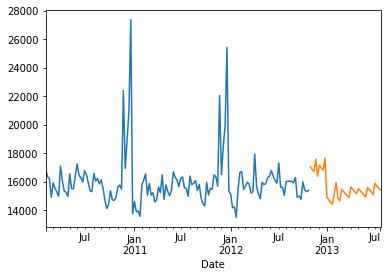

In [44]:
train.groupby('Date').mean()['Weekly_Sales'].plot()
test.groupby('Date').mean()['Weekly_Sales_Predict'].plot()

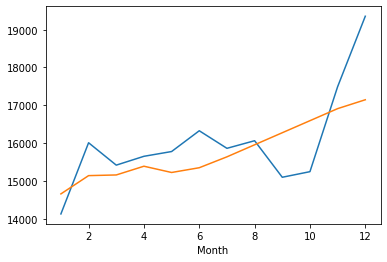

In [45]:
train.groupby('Month').mean()['Weekly_Sales'].plot()
test.groupby('Month').mean()['Weekly_Sales_Predict'].plot()

# Insights from Above Exercise & Initial Regression Models:
As we can see in the previous analysis and EDA that we are far from achieving a low error for the predictions hence, let's focus on the treatment of 'Weekly_Sales' target variable before we try out other ML models

# Target Variable Treatment & Transformation

## Positive Weekly Sales

In [46]:
print('Train Data Positive Weekly Sales: ', (train['Weekly_Sales']>0).sum())

Train Data Positive Weekly Sales:  420212


## Zero Weekly Sales

In [47]:
print('Train Data Zero Weekly Sales: ', (train['Weekly_Sales']==0).sum())

Train Data Zero Weekly Sales:  73


## Negative Weekly Sales

In [48]:
print('Train Data Negative Weekly Sales: ', (train['Weekly_Sales']<0).sum())

Train Data Negative Weekly Sales:  1285


### We propose to remove the negative weekly sales

In [49]:
train = train[train['Weekly_Sales']>=0].copy()

In [50]:
# Now we add 1 to Weekly_Sales to avoid NAN on taking log transform of zero weekly sales
train['Weekly_Sales']= train['Weekly_Sales']+1

## Log transform of Weekly Sales

In [51]:
import numpy as np
train['Weekly_Sales'] = np.log((train['Weekly_Sales']))

In [52]:
# Change dtype for 'Week' to remove error for correlation
train['Week'] = train['Week'].astype('int64')

## Correlation between Log Transformed Target and Independent Variables

In [53]:
corr_train = train.corr()
for col in corr_train.columns: 
    print('Correlation between Weekly Sales and ',col,' is: ',train[col].corr(train.Weekly_Sales,method='pearson'))

Correlation between Weekly Sales and  Store  is:  -0.13528246213724748
Correlation between Weekly Sales and  Dept  is:  0.022520633319697756
Correlation between Weekly Sales and  Weekly_Sales  is:  0.9999999999999998
Correlation between Weekly Sales and  Temperature  is:  -0.04069369503358304
Correlation between Weekly Sales and  Fuel_Price  is:  -0.005728318383211042
Correlation between Weekly Sales and  CPI  is:  -0.01715097925432163
Correlation between Weekly Sales and  Unemployment  is:  -0.043447777211463035
Correlation between Weekly Sales and  Size  is:  0.3184331125856471
Correlation between Weekly Sales and  Day  is:  -0.0036320768206490944
Correlation between Weekly Sales and  Week  is:  0.021236408445109274
Correlation between Weekly Sales and  Month  is:  0.021811820898874262
Correlation between Weekly Sales and  Year  is:  -0.01698533088513551
Correlation between Weekly Sales and  IsHoliday_True  is:  0.005596888129100448
Correlation between Weekly Sales and  Type_B  is:  

## Drop Redundant Date Column

In [54]:
train.drop(columns = 'Date', inplace= True)

In [55]:
train.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Day,Week,Month,Year,IsHoliday_True,Type_B,Type_C
0,1,1,10.123647,42.31,2.572,211.096358,8.106,151315,5,5,2,2010,0,0,0
1,1,1,10.737277,38.51,2.548,211.242170,8.106,151315,12,6,2,2010,1,0,0
2,1,1,10.635773,39.93,2.514,211.289143,8.106,151315,19,7,2,2010,0,0,0
3,1,1,9.873262,46.63,2.561,211.319643,8.106,151315,26,8,2,2010,0,0,0
4,1,1,9.990990,46.50,2.625,211.350143,8.106,151315,5,9,3,2010,0,0,0


# Train-Validation Split from Final Train Data

In [56]:
# Prep X and Y for train-test split
feature_index = np.where(train.columns!='Weekly_Sales')
feature_index_list = list(feature_index[0])
#train.columns
X = train.iloc[:,feature_index_list]
y = train[['Weekly_Sales']]

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 8)

## Standard Scaling : Fit-Transform of Train Data

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
std_scale_X = StandardScaler()
X_train_sc = std_scale_X.fit_transform(X_train)

std_scale_y = StandardScaler()
y_train_sc = std_scale_y.fit_transform(y_train)

## Standard Transform of Validation Data

In [60]:
X_test_sc = std_scale_X.fit_transform(X_test)
y_test_sc = std_scale_y.fit_transform(y_test)

# Visualization of Target Variable - Weekly Sales Price Distribution

## Scaled Weekly Sales Price Distribution for Train

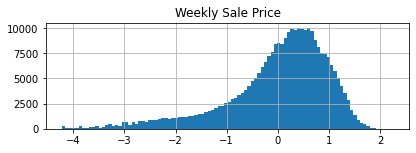

In [61]:
y_train_sc_df = pd.DataFrame(y_train_sc, columns=['Weekly Sale Price'])
y_train_sc_df.head()
y_train_sc_df[y_train_sc_df.columns].hist(stacked=False, bins=100, figsize=(15,35), layout=(14,2));

## Scaled Weekly Sales Price Distribution for Validation

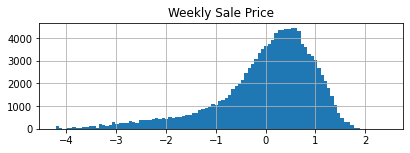

In [62]:
y_test_sc_df = pd.DataFrame(y_test_sc, columns=['Weekly Sale Price'])
y_test_sc_df.head()
y_test_sc_df[y_test_sc_df.columns].hist(stacked=False, bins=100, figsize=(15,35), layout=(14,2));

# Ridge Regression Model

In [63]:
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, Lasso, ElasticNetCV
from sklearn.model_selection import GridSearchCV, LeaveOneOut

In [64]:
ridgeRegressor = Ridge()
ridgeRegressor.fit(X_train_sc,y_train_sc)

Ridge()

In [65]:
# get Ridge coefficient and print them 
Ridge_coefficient = pd.DataFrame() 
Ridge_coefficient["Columns"]= X.columns 
Ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeRegressor.coef_.flatten()) 
print(Ridge_coefficient)

           Columns  Coefficient Estimate
0            Store             -0.050498
1             Dept              0.027036
2      Temperature             -0.011006
3       Fuel_Price             -0.001317
4              CPI             -0.020426
5     Unemployment             -0.014771
6             Size              0.348896
7              Day              0.029245
8             Week             -0.373376
9            Month              0.393748
10            Year             -0.005533
11  IsHoliday_True              0.001010
12          Type_B              0.095583
13          Type_C             -0.004385


In [66]:
print("Best score for cost function: ", ridgeRegressor.score(X_train_sc,y_train_sc))

Best score for cost function:  0.11706625186285013


In [67]:
## Predict on the training data using the predict method
ridgeRegressor.predict(X_train_sc)

array([[ 0.38696573],
       [ 0.25985005],
       [ 0.39333118],
       ...,
       [-0.3484094 ],
       [-0.38068407],
       [ 0.04723181]])

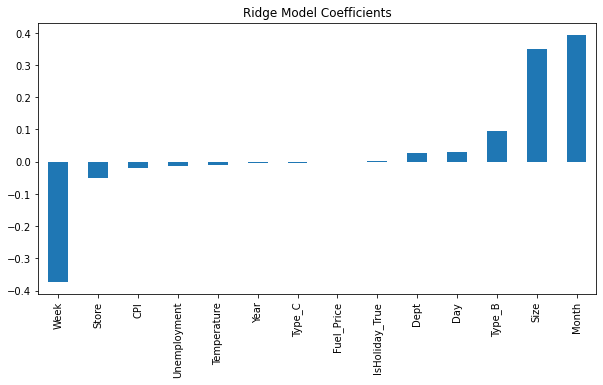

In [68]:
coef_ridge = pd.Series(ridgeRegressor.coef_.flatten(), X.columns).sort_values()
coef_ridge.plot(kind='bar', title='Ridge Model Coefficients',figsize= (10,5));

In [69]:
print(ridgeRegressor.score(X_train_sc,y_train_sc))
print(ridgeRegressor.score(X_test_sc,y_test_sc))

0.11706625186285013
0.1166383572466495


In [70]:
ridge_pred= ridgeRegressor.predict(X_test_sc)

In [71]:
ridge_mae = np.mean(np.abs(y_test_sc - pd.DataFrame(ridge_pred.flatten(),columns=['SalePrice'])))
print('RIDGE MAE: {}'.format(np.round(ridge_mae, 3)))

RIDGE MAE: SalePrice    0.708
dtype: float64


In [72]:
## RMSE Check on the training and Test Data
from sklearn import metrics

RMSE_ridge_train = metrics.mean_squared_error(y_true = y_train_sc, y_pred=ridgeRegressor.predict(X_train_sc),squared=False)
RMSE_ridge_test = metrics.mean_squared_error(y_true = y_test_sc, y_pred=ridgeRegressor.predict(X_test_sc), squared=False)

In [73]:
resultsRidge = pd.DataFrame({'Train RMSE': [RMSE_ridge_train],'Test RMSE': [RMSE_ridge_test]},index=['RidgeRegression'])
resultsRidge

,Train RMSE,Test RMSE
RidgeRegression,0.939646,0.939873


# Elastic Net Regression

In [74]:
from sklearn.linear_model import ElasticNet

Elasticnet_regressor=ElasticNet() 
Elasticnet_regressor.fit(X_train_sc,y_train_sc)

ElasticNet()

In [83]:
# evaluate an elastic net model on the dataset
from numpy import mean
from numpy import std, arange
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

# define model
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
ratios = arange(0, 1, 0.01)
elas_model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
elasres = elas_model.fit(X_train_sc, y_train_sc)

Elasticnet_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(Elasticnet_regressor, X_train_sc, y_train_sc, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116940.28174440328, tolerance: 26.488992576760452
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16139.311103034299, tolerance: 26.505366245479593
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/usr/local/lib/python3.7/dist

Mean MAE: 0.756 (0.004)


In [85]:
# get Elastic Net coefficient and print them 
Elastic_coefficient = pd.DataFrame() 
Elastic_coefficient["Columns"]= X.columns 
Elastic_coefficient['Coefficient Estimate'] = pd.Series(elas_model.coef_) 
print(Elastic_coefficient)

           Columns  Coefficient Estimate
0            Store             -0.050184
1             Dept              0.026607
2      Temperature             -0.010193
3       Fuel_Price             -0.000000
4              CPI             -0.019845
5     Unemployment             -0.014383
6             Size              0.347103
7              Day             -0.003342
8             Week              0.000000
9            Month              0.020961
10            Year             -0.010570
11  IsHoliday_True              0.000171
12          Type_B              0.094140
13          Type_C             -0.005621


In [86]:
print("Best score for cost function: ", elas_model.score(X_train_sc,y_train_sc))

Best score for cost function:  0.11705786700638099


In [87]:
## Predict on the training data using the predict method
elas_model.predict(X_train_sc)

array([ 0.38308182,  0.26367185,  0.39045282, ..., -0.34869781,
       -0.37938436,  0.04551472])

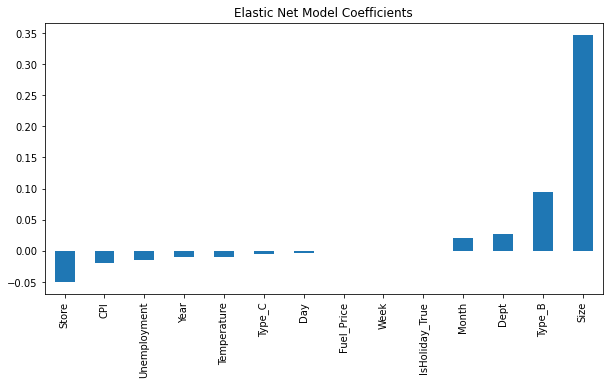

In [89]:
coef_ridge = pd.Series(elas_model.coef_.flatten(), X.columns).sort_values()
coef_ridge.plot(kind='bar', title='Elastic Net Model Coefficients',figsize= (10,5));

In [90]:
print(elas_model.score(X_train_sc,y_train_sc))
print(elas_model.score(X_test_sc,y_test_sc))

0.11705786700638099
0.11661407544294977


In [91]:
elas_pred= elas_model.predict(X_test_sc)

In [93]:
elas_mae = np.mean(np.abs(y_test_sc - pd.DataFrame(elas_pred.flatten(),columns=['SalePrice'])))
print('ELASTIC NET MAE: {}'.format(np.round(elas_mae, 3)))

ELASTIC NET MAE: SalePrice    0.708
dtype: float64


In [96]:
## RMSE Check on the training and Test Data
from sklearn import metrics

RMSE_elas_train = metrics.mean_squared_error(y_true = y_train_sc, y_pred=elas_model.predict(X_train_sc),squared=False)
RMSE_elas_test = metrics.mean_squared_error(y_true = y_test_sc, y_pred=elas_model.predict(X_test_sc), squared=False)

In [97]:
resultsElas = pd.DataFrame({'Train RMSE': [RMSE_elas_train],'Test RMSE': [RMSE_elas_test]},index=['ElasticnetRegression'])
resultsElas

,Train RMSE,Test RMSE
ElasticnetRegression,0.93965,0.939886
